# 0. Set up
## Downloading Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Retrieving Data

I used NYPD Complaint Data Historic to analysis crimes occured in Christmas from 2008 to 2017. 

This dataset includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) from 2006 to the end of last year (2017).

The data could be found here.

https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i/data

In [2]:
christmas = pd.read_csv('/Users/an-yuseon/Desktop/10yearChristmas.csv')

In [3]:
christmas.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,239663726,12/25/2012,00:01:00,NaN,NaN,106.0,05/11/2013,355,OFFENSES AGAINST THE PERSON,191.0,...,F,NaN,40.674518,-73.854313,"(40.67451772, -73.854313096)",PATROL BORO QUEENS SOUTH,NaN,25-44,UNKNOWN,M
1,897925936,12/25/2011,18:57:00,12/25/2011,18:58:00,77.0,05/10/2013,121,CRIMINAL MISCHIEF & RELATED OF,273.0,...,NaN,32.0,40.668806,-73.931122,"(40.668806093, -73.931121567)",PATROL BORO BKLYN NORTH,UTICA AVE.-CROWN HEIGHTS,NaN,UNKNOWN,E
2,820246456,12/25/2012,01:00:00,12/25/2012,01:05:00,9.0,04/22/2013,578,HARRASSMENT 2,638.0,...,M,NaN,40.728316,-73.983333,"(40.728315591, -73.983332556)",PATROL BORO MAN SOUTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,F
3,905670415,12/25/2012,08:00:00,03/06/2013,08:00:00,34.0,04/18/2013,109,GRAND LARCENY,447.0,...,U,NaN,40.856400,-73.930107,"(40.856400421, -73.930106712)",PATROL BORO MAN NORTH,NaN,25-44,BLACK HISPANIC,M
4,395514344,12/25/2012,08:00:00,03/22/2013,08:00:00,104.0,04/17/2013,109,GRAND LARCENY,422.0,...,NaN,NaN,40.717340,-73.887411,"(40.717340352, -73.887411135)",PATROL BORO QUEENS NORTH,NaN,65+,WHITE,F


In [4]:
christmas.shape

(8464, 35)

## Cleaning& Formatting DataFrame

### Select needed columns
Since I am going to analyze suspect's race and age per borough, I will select columns that are needed.

In [5]:
xmas = christmas[['BORO_NM', 'SUSP_RACE','SUSP_AGE_GROUP']]

### Change column names.
I shortened column names for efficient programming. 

In [6]:
xmas.columns = ['boro', 'race', 'age']
xmas.head()

,boro,race,age
0,QUEENS,WHITE HISPANIC,25-44
1,BROOKLYN,NaN,NaN
2,MANHATTAN,WHITE,45-64
3,MANHATTAN,UNKNOWN,NaN
4,QUEENS,NaN,NaN


### Remove NAs and Unknowns
Some values are unknown or nan. I removed those.

In [7]:
xmas = xmas[xmas!='UNKNOWN'].dropna()
xmas.head()

,boro,race,age
0,QUEENS,WHITE HISPANIC,25-44
2,MANHATTAN,WHITE,45-64
6,BROOKLYN,WHITE HISPANIC,45-64
10,QUEENS,WHITE HISPANIC,18-24
15,STATEN ISLAND,WHITE HISPANIC,25-44


# 1. Christmas Crime Prevalence per Borough 

I counted how many crimes occured in christmas per borough. 

In [8]:
xmas['boro'].value_counts()

BROOKLYN         753
BRONX            656
QUEENS           553
MANHATTAN        406
STATEN ISLAND    178
Name: boro, dtype: int64

Text(0.5,1,'# of crimes per borough')

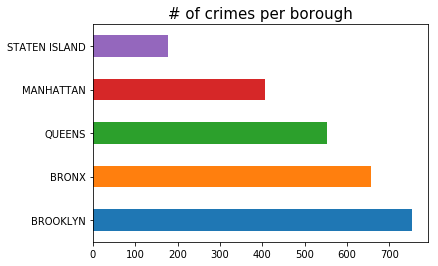

In [9]:
fig, ax0 = plt.subplots() 
plt.rc('axes', titlesize=15)
xmas['boro'].value_counts().plot(ax=ax0, kind='barh')
ax0.set_title('# of crimes per borough')

Brooklyn's number of crimes occured during the Christmas day was the highest, and then Bronx, Queens, Manhattan, and Staten Island was the least. 

I thought this result was due to the population difference between the boroughs. 

### Adding US Census statistics

To prove my hypothesis, I used New York City Boroughs Population data from **US CENSUS Bureau**. Since the percentage of increase in population per each borough is simillar, I used 2010 data. 

https://www.citypopulation.de/php/usa-newyorkcity.php

In [10]:
pop = pd.read_csv('/Users/an-yuseon/Desktop/pop_borough.csv')
pop.head()

,Borough,Population(2010-04-01)
0,BROOKLYN,1384794
1,BRONX,2504706
2,QUEENS,1586184
3,MANHATTAN,2230545
4,STATEN ISLAND,468730


### Merge DataFrames

To merge this dataframe with the result of xmas['boro'].value_counts() which is series, I changed the series into dataframe and named columns. 

In [11]:
boroN = pd.DataFrame(xmas['boro'].value_counts().reset_index())
boroN.columns = ['Borough', 'Number of Crimes']
print(boroN)
type(boroN)

         Borough  Number of Crimes
0       BROOKLYN               753
1          BRONX               656
2         QUEENS               553
3      MANHATTAN               406
4  STATEN ISLAND               178


pandas.core.frame.DataFrame

In [12]:
pop_merged = pd.merge(boroN, pop, on='Borough')
pop_merged = pop_merged.set_index('Borough')
pop_merged

,Number of Crimes,Population(2010-04-01)
Borough,,
BROOKLYN,753,1384794
BRONX,656,2504706
QUEENS,553,1586184
MANHATTAN,406,2230545
STATEN ISLAND,178,468730


### Create A New Column

I created a new column which shows (number of crimes) * 100 / population per borough.


In [13]:
pop_merged['(# of crimes * 100) / # of pop'] = pop_merged['Number of Crimes']*100/pop_merged['Population(2010-04-01)']
pop_merged

,Number of Crimes,Population(2010-04-01),(# of crimes * 100) / # of pop
Borough,,,
BROOKLYN,753,1384794,0.054376
BRONX,656,2504706,0.026191
QUEENS,553,1586184,0.034864
MANHATTAN,406,2230545,0.018202
STATEN ISLAND,178,468730,0.037975


Text(0.5,1,'( Number of crimes * 100) / Number of population')

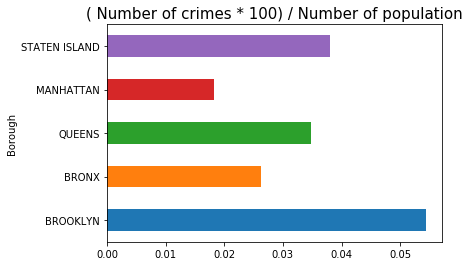

In [14]:
fig, ax1 = plt.subplots() 
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=13)
pop_merged['(# of crimes * 100) / # of pop'].plot(ax=ax1, kind='barh')
ax1.set_title('( Number of crimes * 100) / Number of population')

### Result

Considering each borough's population, during Christmas day, Brooklyn had the highest crime rates and Manhattan had the lowest rates.


(Add more explanation)

# 2. Suspects' Race Distribution per Borough

### Formatting DataFrame

I set borough as the index.

In [15]:
xmas_b = xmas.set_index('boro')
xmas_b.head()

,race,age
boro,,
QUEENS,WHITE HISPANIC,25-44
MANHATTAN,WHITE,45-64
BROOKLYN,WHITE HISPANIC,45-64
QUEENS,WHITE HISPANIC,18-24
STATEN ISLAND,WHITE HISPANIC,25-44


I will sort the dataframe by boroughs. 

In [16]:
queens = xmas_b.loc['QUEENS',:]
manhattan = xmas_b.loc['MANHATTAN',:]
brooklyn = xmas_b.loc['BROOKLYN',:]
bronx = xmas_b.loc['BRONX',:]
staten = xmas_b.loc['STATEN ISLAND',:]

### Analyzing Race distribution

In [17]:
QRR = queens['race'].value_counts()
MHR = manhattan['race'].value_counts()
BKR = brooklyn['race'].value_counts()
BXR = bronx['race'].value_counts()
STR = staten['race'].value_counts()

Text(0.5,1,"SUSPECTS' AGE DISTRIBUTION : STATEN ISLAND")

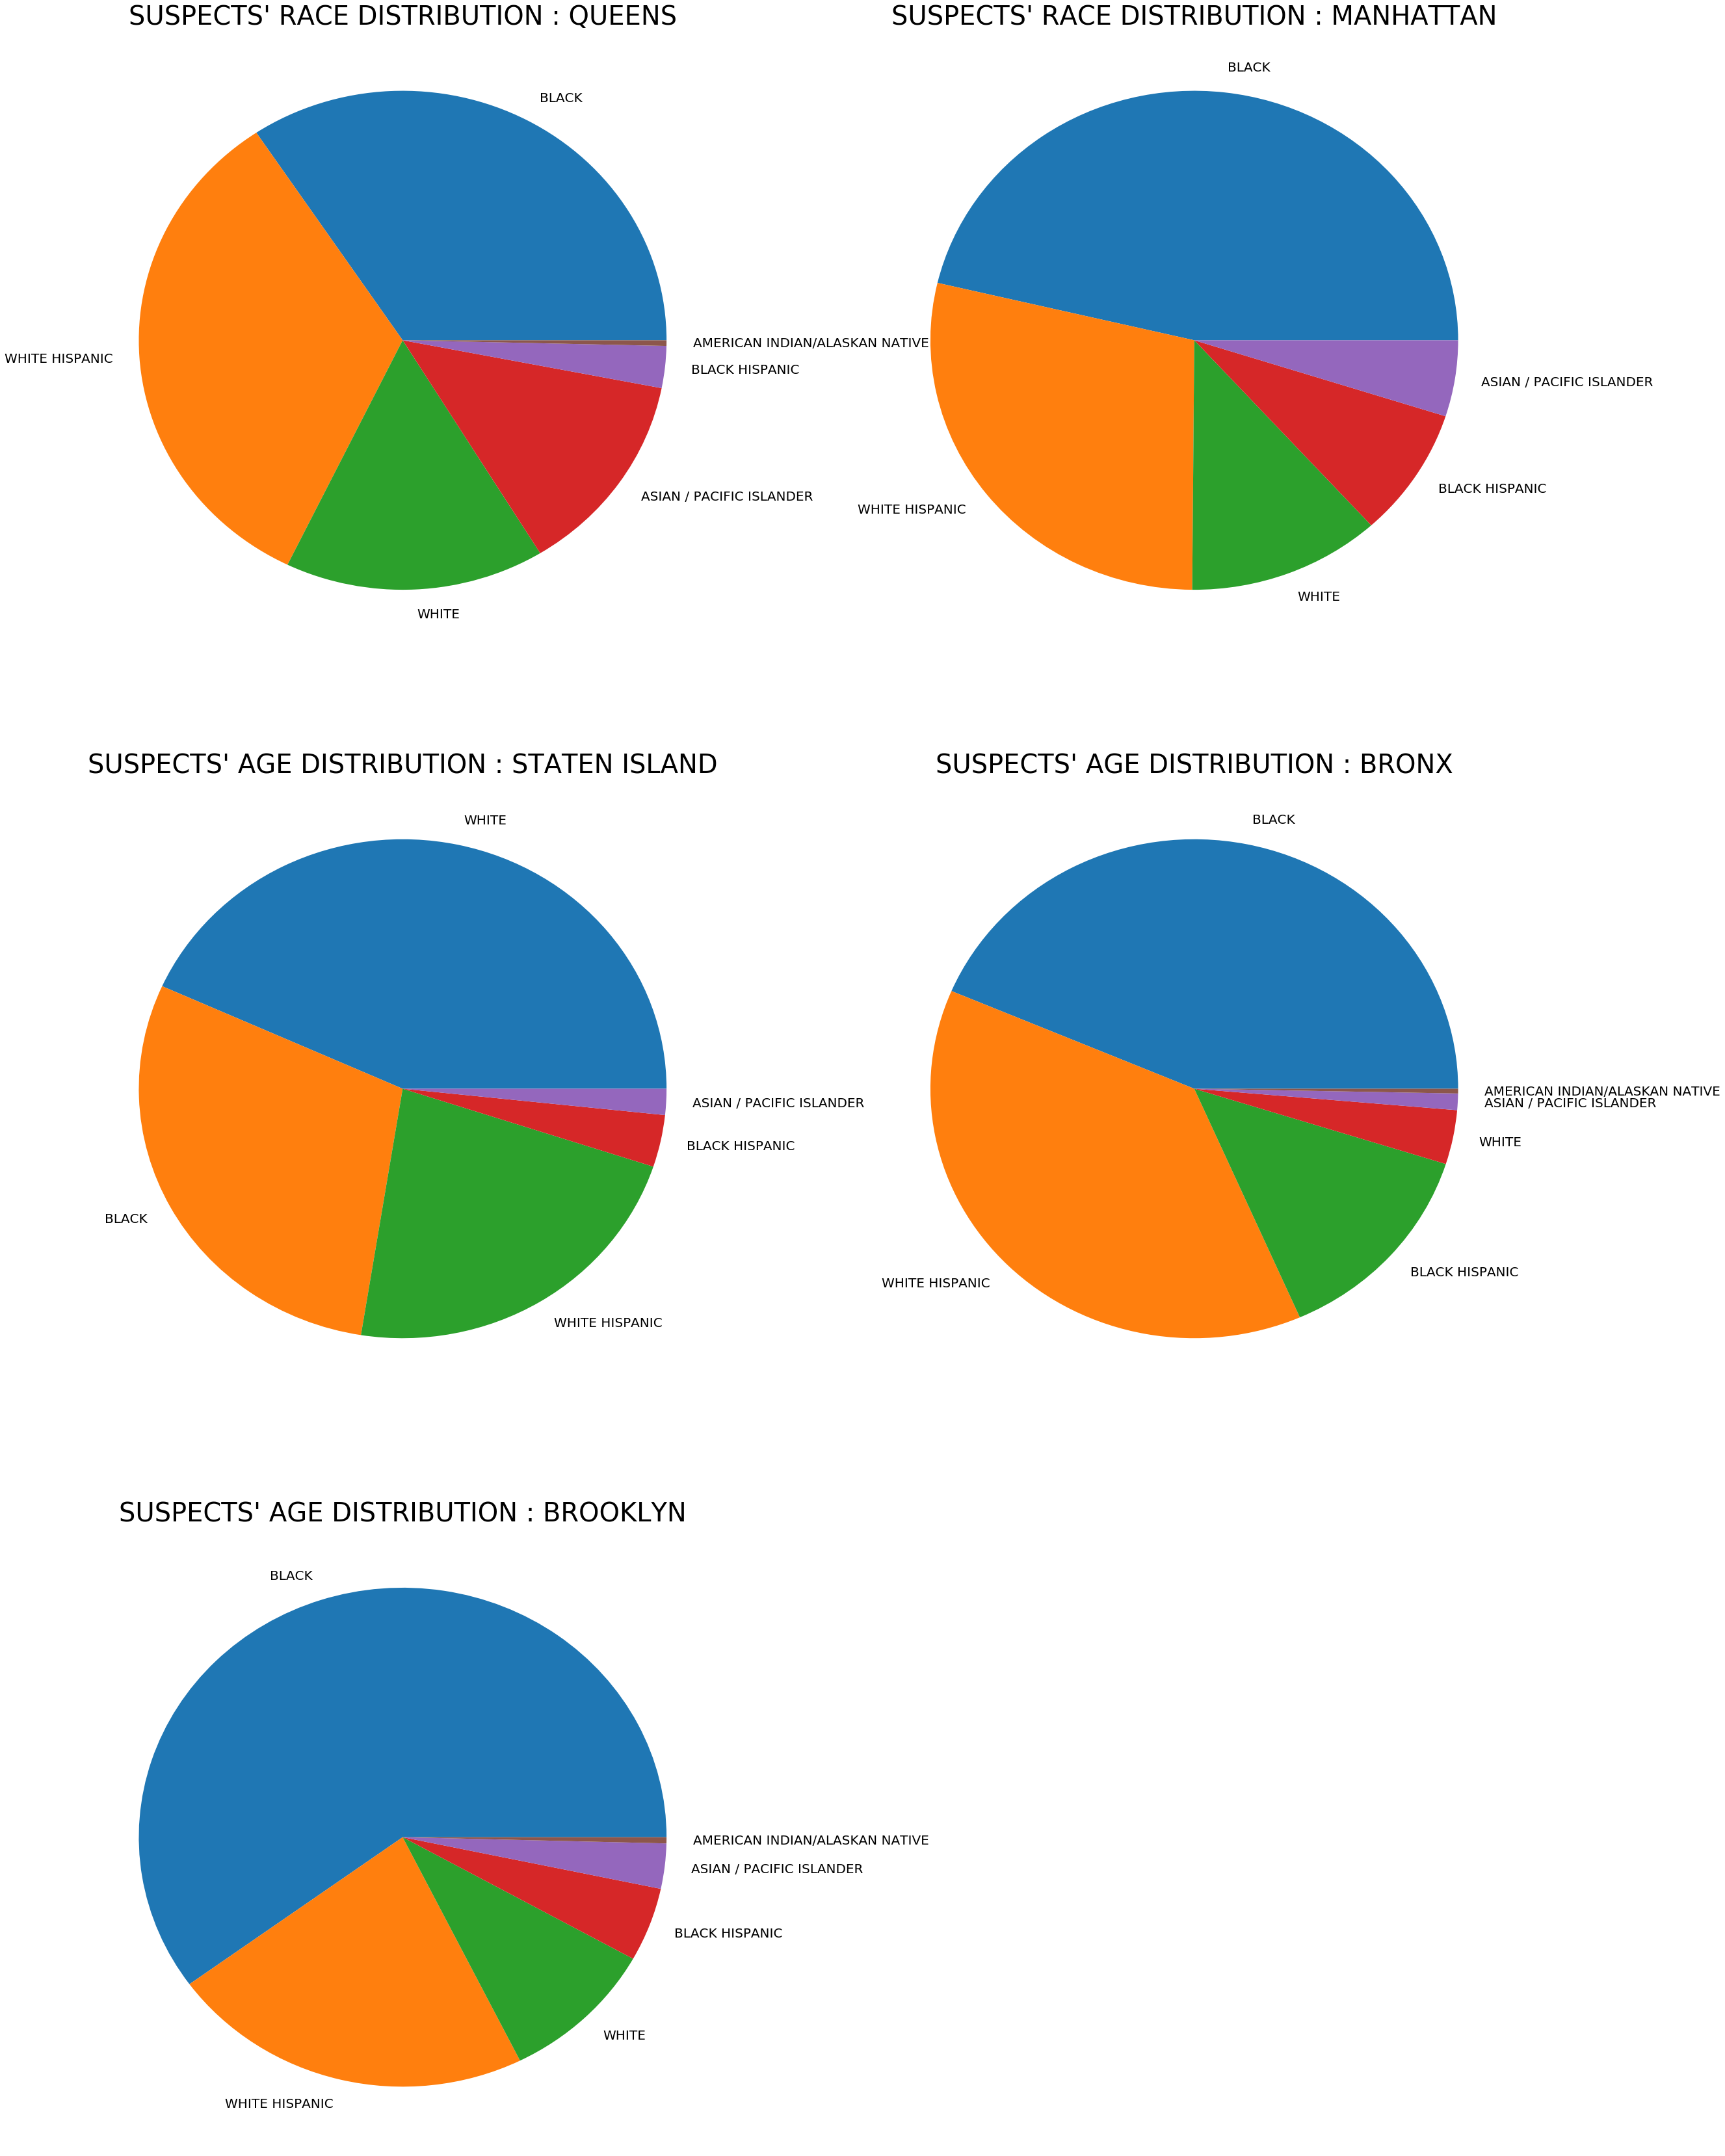

In [18]:
fig  = plt.figure(figsize=(40,60))
plt.rc('font', size=20)
plt.rc('axes', titlesize=40)

ax1 = plt.subplot2grid((3,2),(0,0))
QRR.plot(ax=ax1, kind='pie')
ax1.set_ylabel('')
ax1.set_title("SUSPECTS' RACE DISTRIBUTION : QUEENS")

ax1 = plt.subplot2grid((3,2), (0, 1))
MHR.plot(ax=ax1, kind='pie')
ax1.set_ylabel('')
ax1.set_title("SUSPECTS' RACE DISTRIBUTION : MANHATTAN")

ax1 = plt.subplot2grid((3,2), (2, 0))
BKR.plot(ax=ax1, kind='pie')
ax1.set_ylabel('')
ax1.set_title("SUSPECTS' AGE DISTRIBUTION : BROOKLYN")

ax1 = plt.subplot2grid((3,2), (1, 1))
BXR.plot(ax=ax1, kind='pie')
ax1.set_ylabel('')
ax1.set_title("SUSPECTS' AGE DISTRIBUTION : BRONX")

ax1 = plt.subplot2grid((3,2), (1, 0))
STR.plot(ax=ax1, kind='pie')
ax1.set_ylabel('')
ax1.set_title("SUSPECTS' AGE DISTRIBUTION : STATEN ISLAND")

### Result

(add explanation)

# 3. Suspects' Age Distribution per Borough

### Formatting DataFrame

In [19]:
QRA = queens['age'].value_counts()
MHA = manhattan['age'].value_counts()
BKA = brooklyn['age'].value_counts()
BXA = bronx['age'].value_counts()
STA = staten['age'].value_counts()

Text(0.5,1,"SUSPECTS' AGE DISTRIBUTION : STATEN ISLAND")

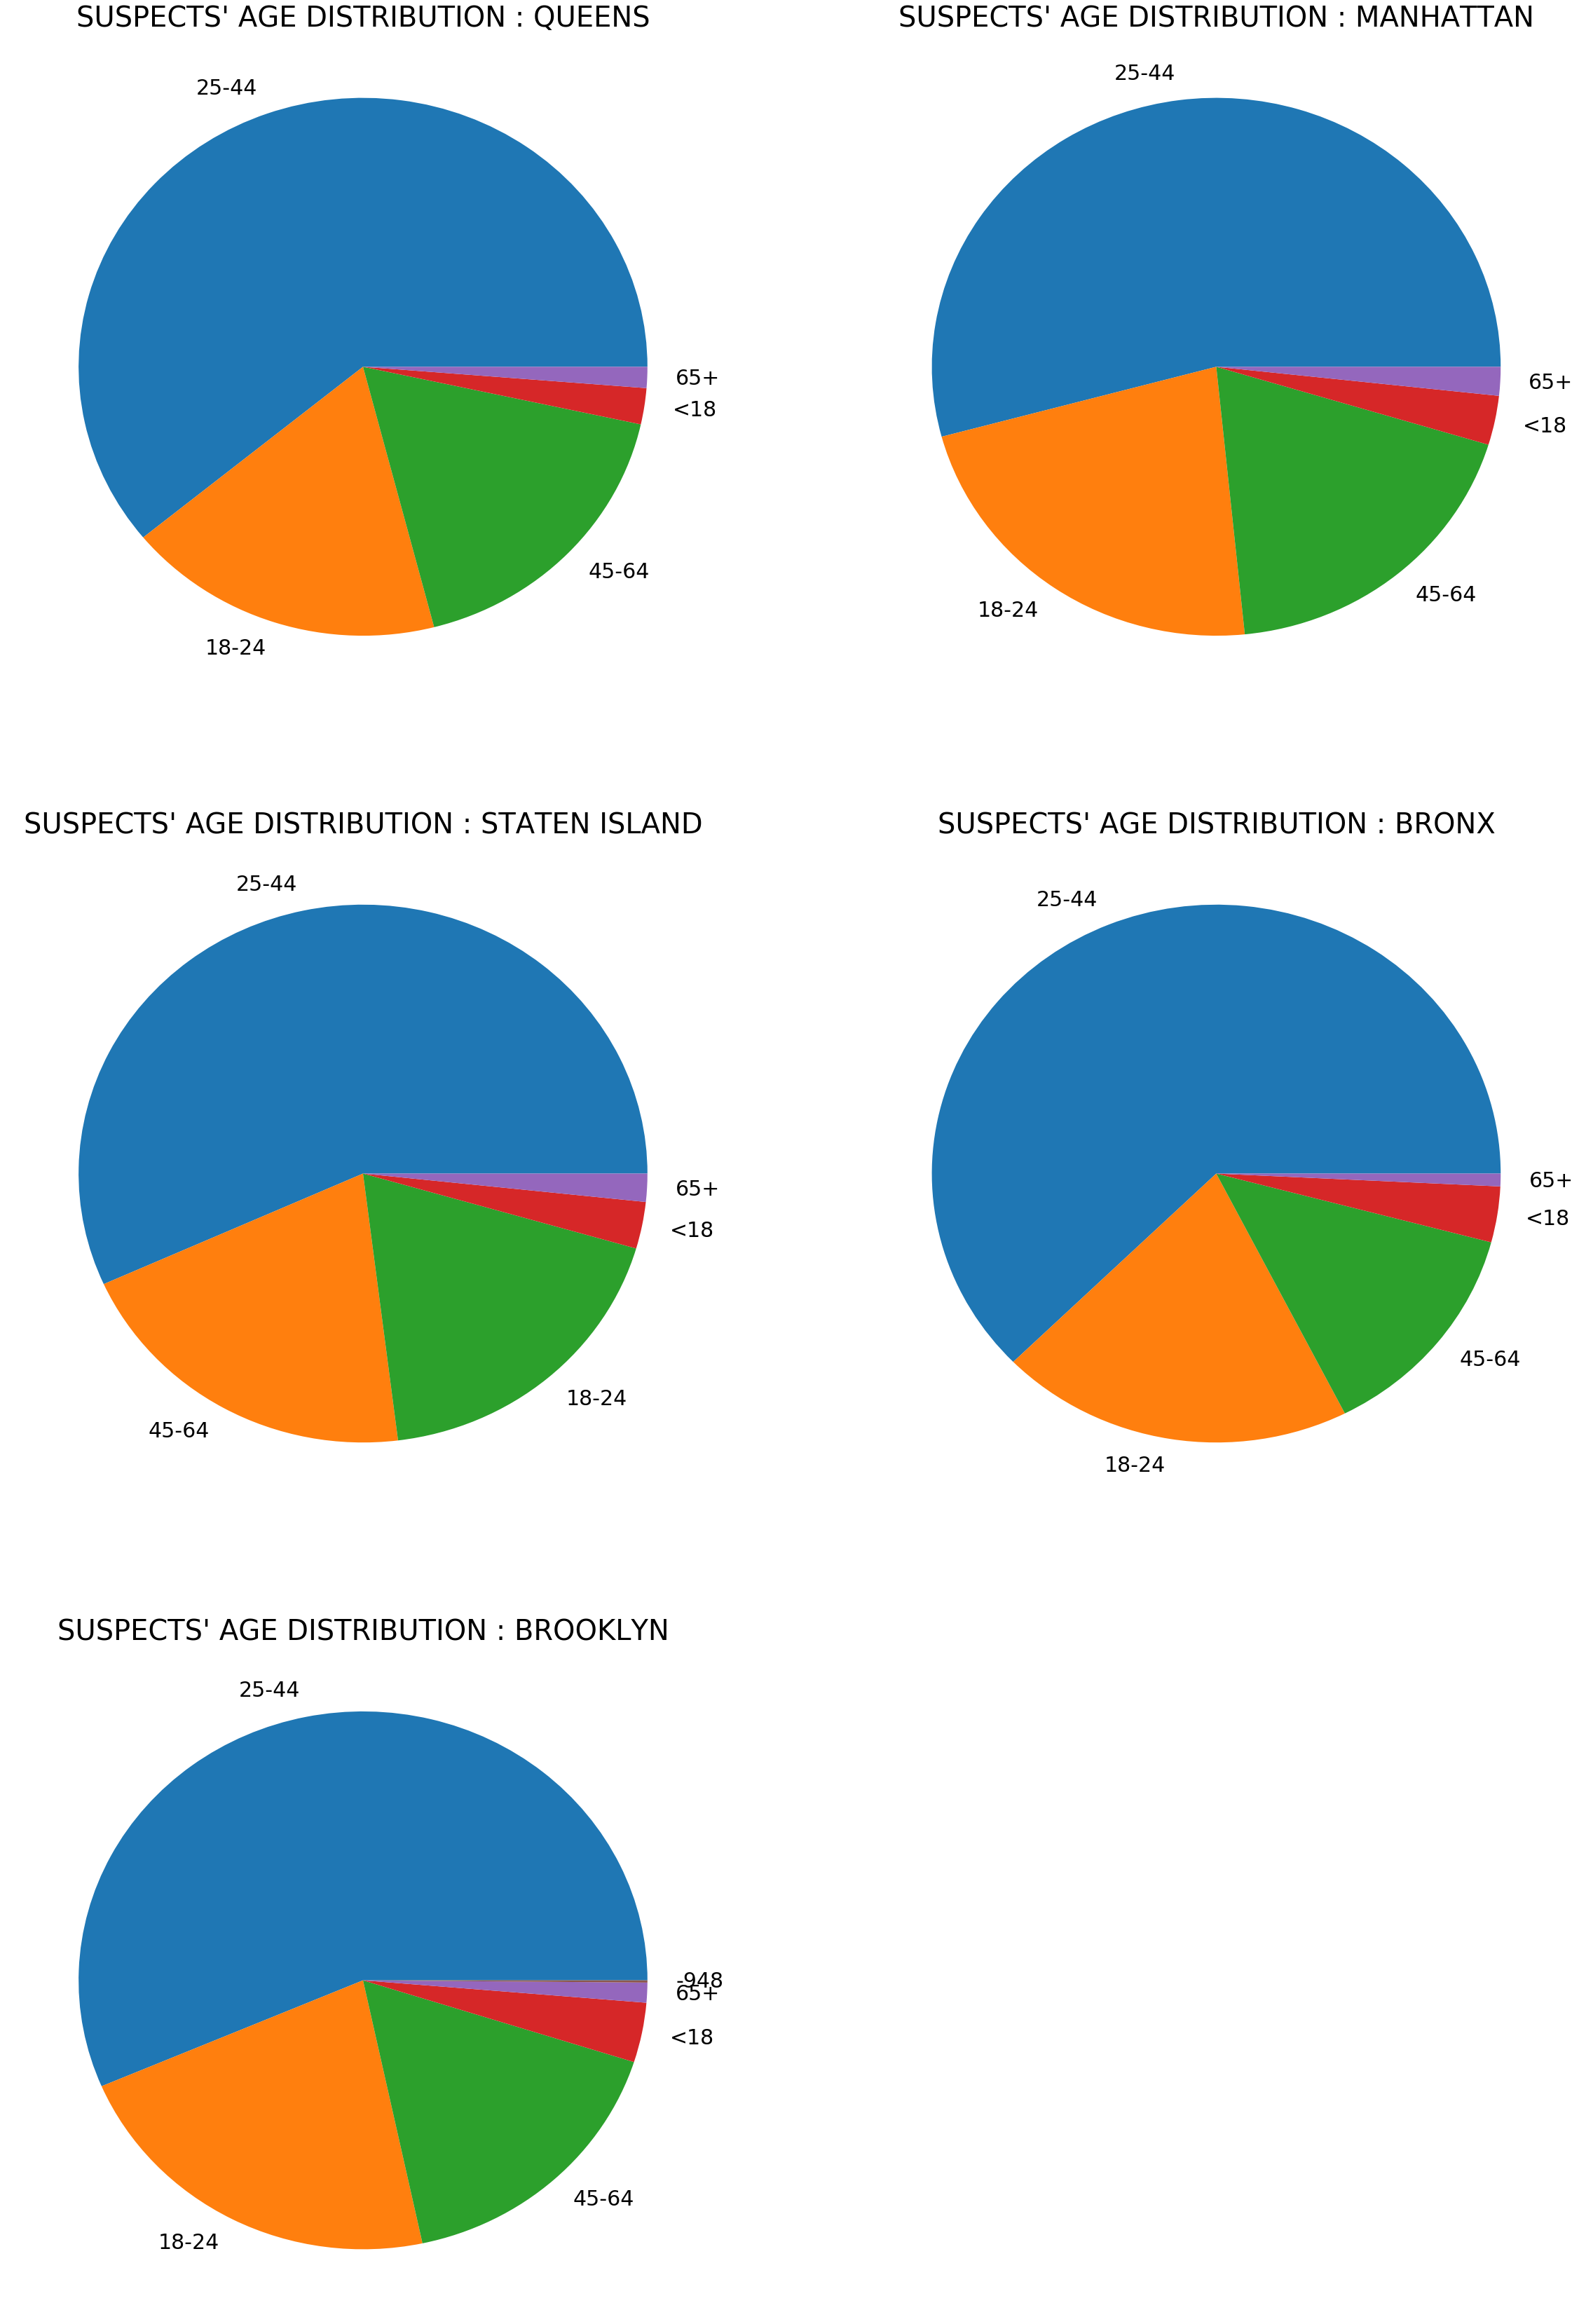

In [20]:
fig  = plt.figure(figsize=(40,60))
plt.rc('font', size=30)
plt.rc('axes', titlesize=40)

ax1 = plt.subplot2grid((3,2),(0,0))
QRA.plot(ax=ax1, kind='pie')
ax1.set_ylabel('')
ax1.set_title("SUSPECTS' AGE DISTRIBUTION : QUEENS")

ax1 = plt.subplot2grid((3,2), (0, 1))
MHA.plot(ax=ax1, kind='pie')
ax1.set_ylabel('')
ax1.set_title("SUSPECTS' AGE DISTRIBUTION : MANHATTAN")

ax1 = plt.subplot2grid((3,2), (2, 0))
BKA.plot(ax=ax1, kind='pie')
ax1.set_ylabel('')
ax1.set_title("SUSPECTS' AGE DISTRIBUTION : BROOKLYN")

ax1 = plt.subplot2grid((3,2), (1, 1))
BXA.plot(ax=ax1, kind='pie')
ax1.set_ylabel('')
ax1.set_title("SUSPECTS' AGE DISTRIBUTION : BRONX")

ax1 = plt.subplot2grid((3,2), (1, 0))
STA.plot(ax=ax1, kind='pie')
ax1.set_ylabel('')
ax1.set_title("SUSPECTS' AGE DISTRIBUTION : STATEN ISLAND")

### Result

(add explanation)